이 데이터는 미국에 숲의 나무 생태를 조사한 것이다.



In [1]:
from sklearn.datasets import fetch_covtype
covtype = fetch_covtype()
print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

이번에는 어떤 특징이 있는지 나와있지 않으므로 54개의 특징을 1~54까지 할당한다.

covtype.data에는 특징이 covtype.target에는 어떤 종류의 나무인지를 나타낸다.

df에 특징과 나무 종류를 데이터프레임으로 할당한다.

In [2]:
import pandas as pd
df = pd.DataFrame(covtype.data, 
                  columns=["x{:02d}".format(i + 1) for i in range(covtype.data.shape[1])],
                  dtype=int)
sy = pd.Series(covtype.target, dtype="category")
df['y']=sy

각 나무의 개수

In [3]:
sy.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
dtype: int64

In [4]:
df.head(1)

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,y
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5


각 특징에 결손값이 있는지 없는지 확인

In [5]:
df.isnull().sum()

x01    0
x02    0
x03    0
x04    0
x05    0
x06    0
x07    0
x08    0
x09    0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
x30    0
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x53    0
x54    0
y      0
dtype: int64

train과 test로 분할한다.

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1],sy,test_size = 0.2, random_state= 0)

In [7]:
print(x_train.shape)
print(y_train.shape)
print('----')
print(x_test.shape)
print(y_test.shape)

(464809, 54)
(464809,)
----
(116203, 54)
(116203,)


train 데이터로 모델 학습

In [26]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 1, random_state = 0)

model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

DecisionTreeClassifier는 분기조건으로 두 데이터를 나눴을 때 자식 노드의 불순도가 가장 낮은 것을 선택한다.

DecisionTreeClassifier가 어떤 열을 특징으로 분기 했는지 확인

In [27]:
model.tree_.feature

array([ 0, -2, -2])

In [28]:
from collections import Counter
print(Counter(model.tree_.feature))
print(len(Counter(model.tree_.feature)))

Counter({-2: 2, 0: 1})
2


분기에 사용된 특징에서의 각 데이터 분포 확인  


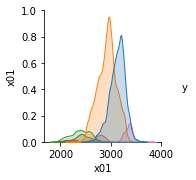

In [29]:
import seaborn as sns

sns.pairplot(vars=["x01"], 
             data=df, hue='y')


In [30]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 2, random_state = 0)

model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

DecisionTreeClassifier는 분기조건으로 두 데이터를 나눴을 때 자식 노드의 불순도가 가장 낮은 것을 선택한다.

DecisionTreeClassifier가 어떤 열을 특징으로 분기 했는지 확인

In [31]:
model.tree_.feature

array([ 0,  0, -2, -2,  0, -2, -2])

In [32]:
from collections import Counter
print(Counter(model.tree_.feature))
print(len(Counter(model.tree_.feature)))

Counter({-2: 4, 0: 3})
2


분기에 사용된 특징에서의 각 데이터 분포 확인  


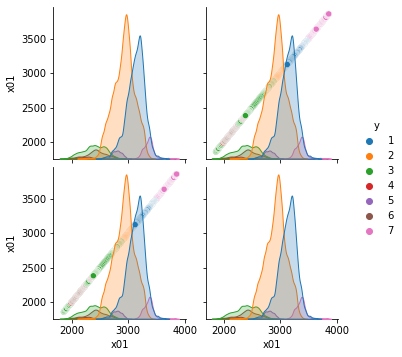

In [33]:
import seaborn as sns

sns.pairplot(vars=["x01","x01"], 
             data=df, hue='y')


위에 한 과정대로 max_depth가 3인 트리 모델을 만듬.

In [95]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3, random_state = 0)

model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

DecisionTreeClassifier는 분기조건으로 두 데이터를 나눴을 때 자식 노드의 불순도가 가장 낮은 것을 선택한다.

DecisionTreeClassifier가 어떤 열을 특징으로 분기 했는지 확인

In [96]:
model.tree_.feature

array([ 0,  0,  3, -2, -2, 17, -2, -2,  0,  7, -2, -2, 12, -2, -2])

분기에 사용된 특징에서의 각 데이터 분포 확인  

/home/labuser/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


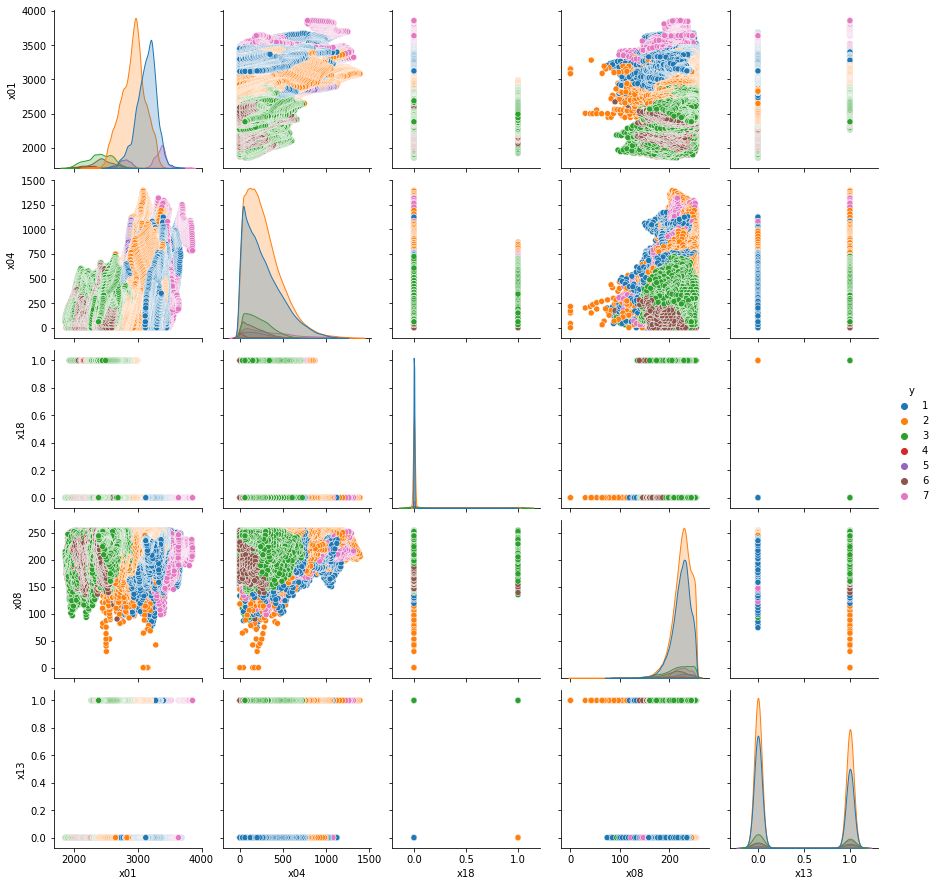

In [38]:
import seaborn as sns

sns.pairplot(vars=["x01","x04","x18",'x08','x13'], 
             data=df, hue='y')


[Text(697.5, 792.75, 'x01 <= 3044.5\ngini = 0.623\nsamples = 464809\nvalue = [169628, 226452, 28660, 2178, 7607, 13865, 16419]'),
 Text(348.75, 566.25, 'x01 <= 2510.5\ngini = 0.553\nsamples = 269396\nvalue = [46079, 170947, 28660, 2178, 7607, 13865, 60]'),
 Text(174.375, 339.75, 'x04 <= 15.0\ngini = 0.581\nsamples = 34265\nvalue = [8, 2668, 19699, 2175, 98, 9617, 0]'),
 Text(87.1875, 113.25, 'gini = 0.712\nsamples = 2472\nvalue = [7, 203, 641, 872, 11, 738, 0]'),
 Text(261.5625, 113.25, 'gini = 0.555\nsamples = 31793\nvalue = [1, 2465, 19058, 1303, 87, 8879, 0]'),
 Text(523.125, 339.75, 'x18 <= 0.5\ngini = 0.447\nsamples = 235131\nvalue = [46071, 168279, 8961, 3, 7509, 4248, 60]'),
 Text(435.9375, 113.25, 'gini = 0.429\nsamples = 227901\nvalue = [45926, 165765, 5154, 3, 7046, 4002, 5]'),
 Text(610.3125, 113.25, 'gini = 0.596\nsamples = 7230\nvalue = [145, 2514, 3807, 0, 463, 246, 55]'),
 Text(1046.25, 566.25, 'x01 <= 3318.5\ngini = 0.513\nsamples = 195413\nvalue = [123549, 55505, 0, 0,

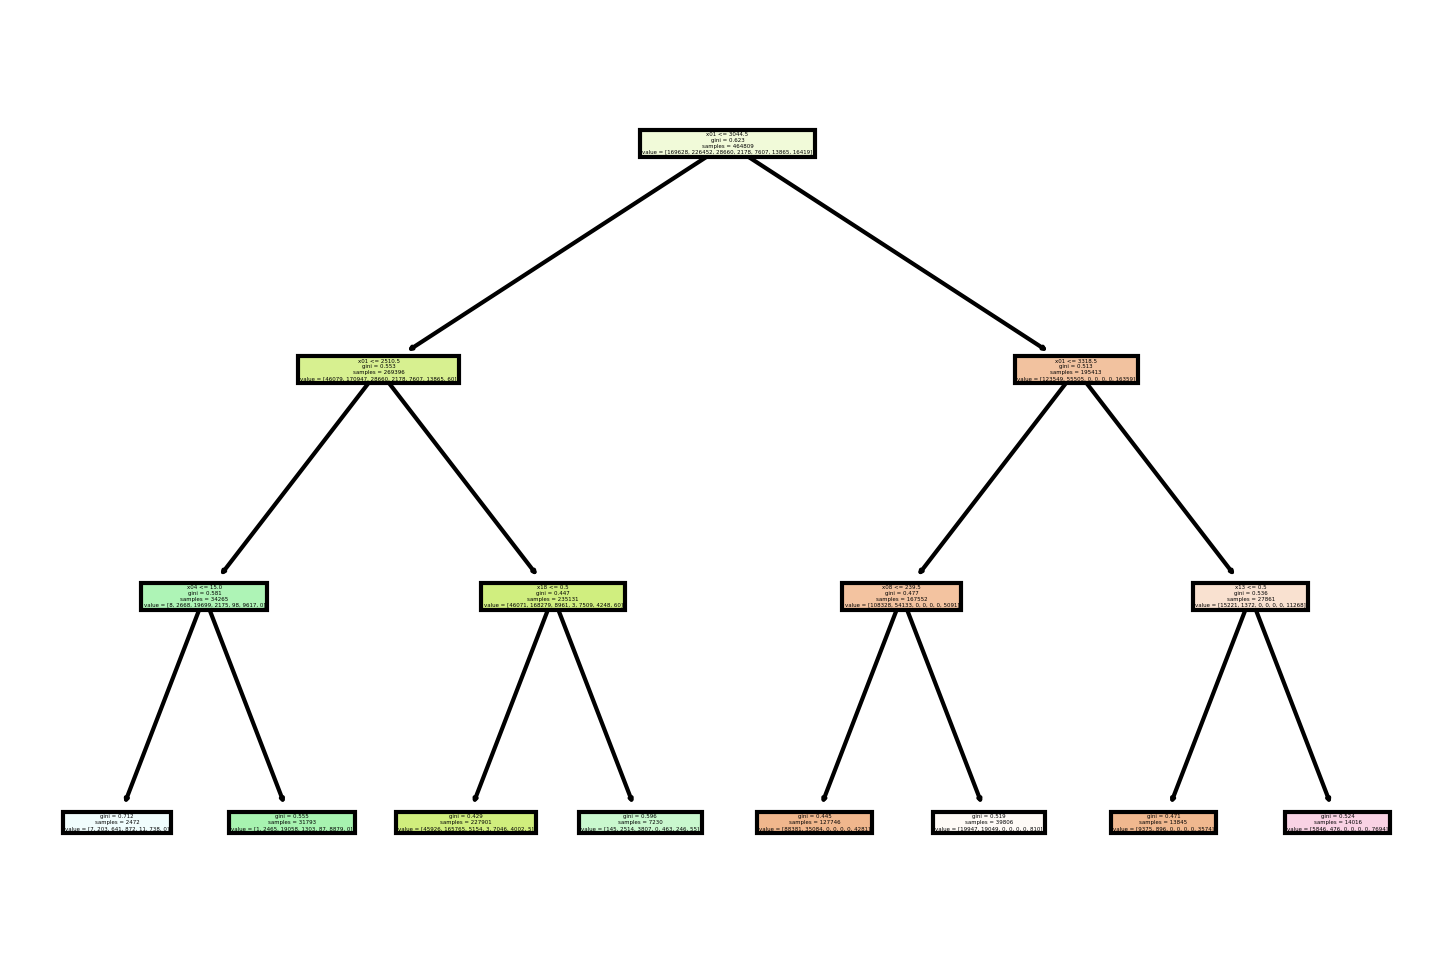

In [97]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(dpi=300)
plot_tree(model,feature_names = x_train.columns,filled = True)

In [98]:
model.tree_.threshold

array([ 3.0445e+03,  2.5105e+03,  1.5000e+01, -2.0000e+00, -2.0000e+00,
        5.0000e-01, -2.0000e+00, -2.0000e+00,  3.3185e+03,  2.3950e+02,
       -2.0000e+00, -2.0000e+00,  5.0000e-01, -2.0000e+00, -2.0000e+00])

In [99]:
model.score(x_test,y_test)

0.6761615448826622

다른 특징을 기준으로 분류를 해본다.

/home/labuser/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


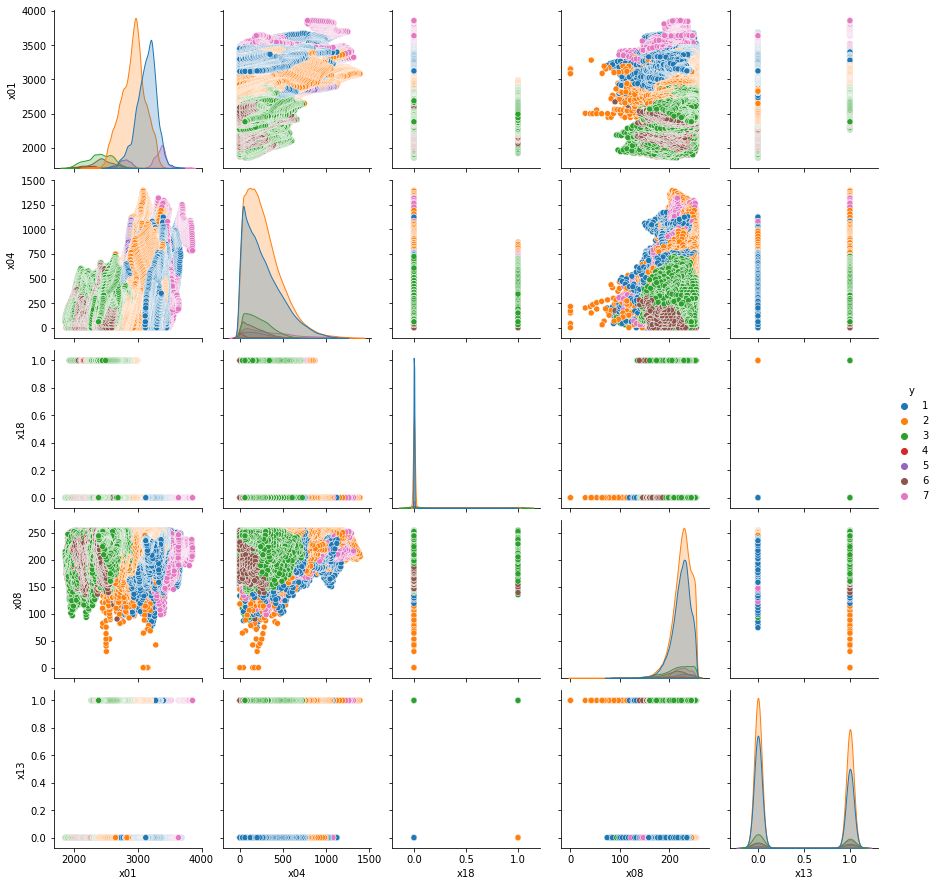

In [38]:
import seaborn as sns

sns.pairplot(vars=["x01","x04","x18",'x08','x13'], 
             data=df, hue='y')


[Text(697.5, 792.75, 'x01 <= 3044.5\ngini = 0.623\nsamples = 464809\nvalue = [169628, 226452, 28660, 2178, 7607, 13865, 16419]'),
 Text(348.75, 566.25, 'x01 <= 2510.5\ngini = 0.553\nsamples = 269396\nvalue = [46079, 170947, 28660, 2178, 7607, 13865, 60]'),
 Text(174.375, 339.75, 'x04 <= 15.0\ngini = 0.581\nsamples = 34265\nvalue = [8, 2668, 19699, 2175, 98, 9617, 0]'),
 Text(87.1875, 113.25, 'gini = 0.712\nsamples = 2472\nvalue = [7, 203, 641, 872, 11, 738, 0]'),
 Text(261.5625, 113.25, 'gini = 0.555\nsamples = 31793\nvalue = [1, 2465, 19058, 1303, 87, 8879, 0]'),
 Text(523.125, 339.75, 'x18 <= 0.5\ngini = 0.447\nsamples = 235131\nvalue = [46071, 168279, 8961, 3, 7509, 4248, 60]'),
 Text(435.9375, 113.25, 'gini = 0.429\nsamples = 227901\nvalue = [45926, 165765, 5154, 3, 7046, 4002, 5]'),
 Text(610.3125, 113.25, 'gini = 0.596\nsamples = 7230\nvalue = [145, 2514, 3807, 0, 463, 246, 55]'),
 Text(1046.25, 566.25, 'x01 <= 3318.5\ngini = 0.513\nsamples = 195413\nvalue = [123549, 55505, 0, 0,

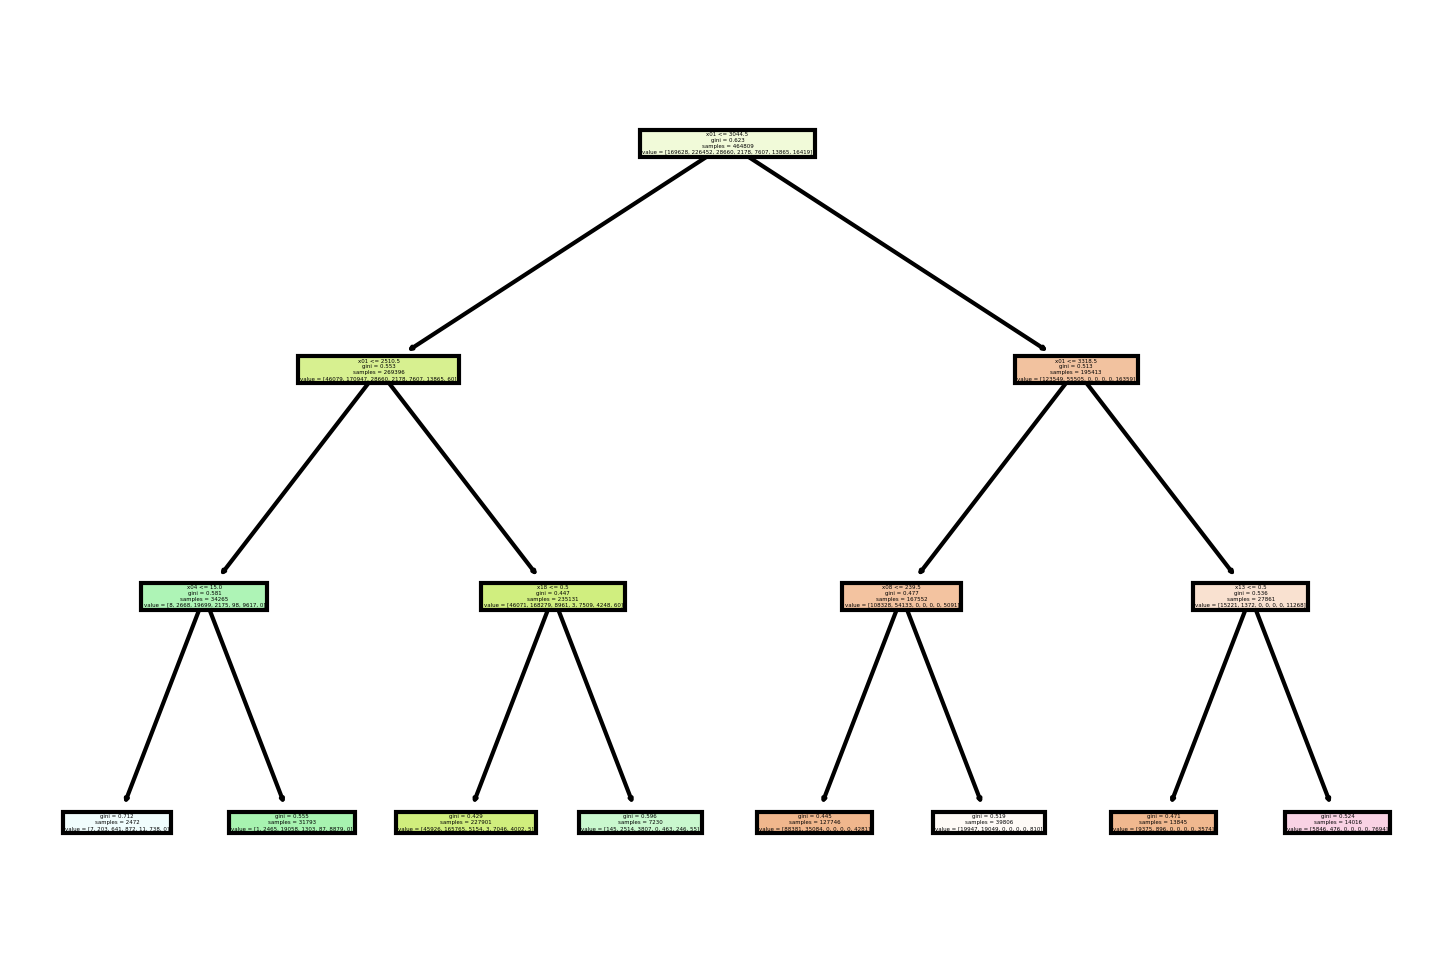

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(dpi=300)
plot_tree(model,feature_names = x_train.columns,filled = True)

In [93]:
from collections import Counter
print(Counter(model.tree_.feature))
print(len(Counter(model.tree_.feature)))

Counter({-2: 774, 5: 156, 9: 156, 0: 99, 3: 65, 4: 50, 1: 45, 6: 34, 2: 28, 7: 26, 8: 20, 12: 11, 23: 7, 36: 7, 35: 6, 42: 6, 37: 5, 45: 5, 52: 5, 17: 4, 10: 4, 46: 4, 15: 3, 13: 3, 16: 3, 48: 3, 14: 2, 30: 2, 44: 2, 51: 2, 26: 2, 29: 1, 18: 1, 24: 1, 33: 1, 22: 1, 43: 1, 11: 1, 40: 1})
39


/home/labuser/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/labuser/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


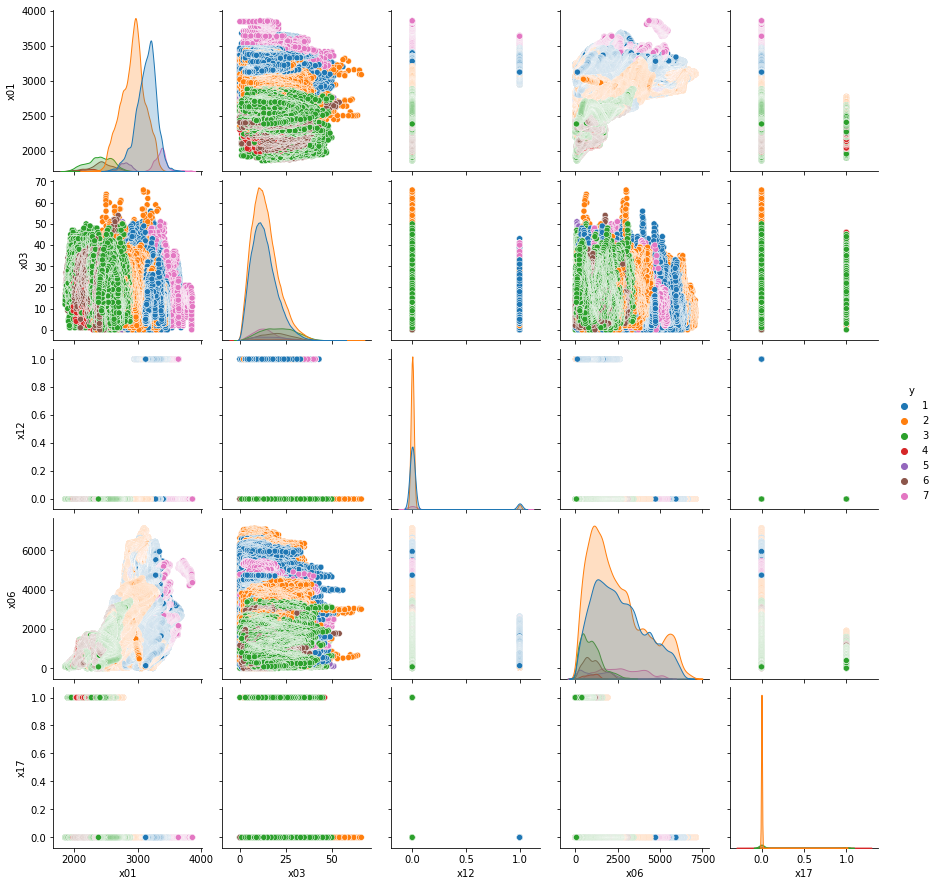

In [18]:
import seaborn as sns

sns.pairplot(vars=["x01","x03","x12","x06","x17",], 
             data=df, hue='y')


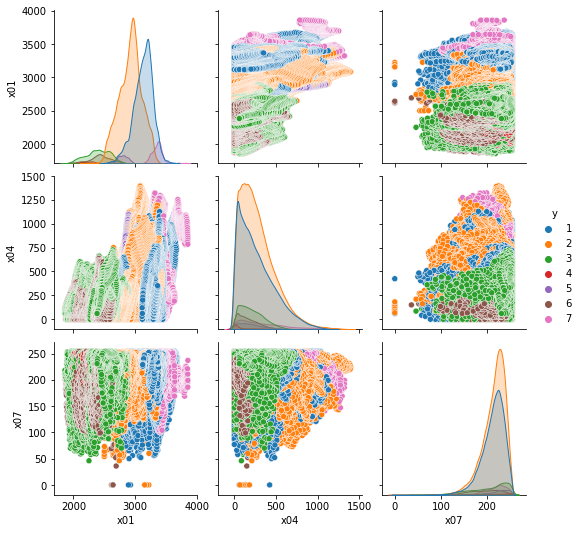

In [12]:
import seaborn as sns

sns.pairplot(vars=["x01","x04","x07"], 
             data=df, hue='y')


분기조건의 값 확인


In [10]:
model.tree_.threshold

array([ 3.0445e+03,  2.5105e+03,  1.5000e+01,  5.0000e-01,  2.3375e+03,
        1.9450e+02, -2.0000e+00, -2.0000e+00,  2.4495e+03, -2.0000e+00,
       -2.0000e+00,  5.0000e-01,  1.7850e+02, -2.0000e+00, -2.0000e+00,
        1.2925e+03, -2.0000e+00, -2.0000e+00,  2.4355e+03,  5.0000e-01,
        6.2500e+02, -2.0000e+00, -2.0000e+00,  1.2485e+03, -2.0000e+00,
       -2.0000e+00,  5.0000e-01,  5.0000e-01, -2.0000e+00, -2.0000e+00,
        8.4500e+01, -2.0000e+00, -2.0000e+00,  5.0000e-01,  5.0000e-01,
        2.9425e+03,  5.0000e-01, -2.0000e+00, -2.0000e+00,  1.2550e+02,
       -2.0000e+00, -2.0000e+00,  1.3935e+03,  7.8500e+01, -2.0000e+00,
       -2.0000e+00,  2.4100e+02, -2.0000e+00, -2.0000e+00,  2.6785e+03,
        2.6235e+03,  5.0000e-01, -2.0000e+00, -2.0000e+00,  5.5500e+01,
       -2.0000e+00, -2.0000e+00,  1.2075e+03,  4.2550e+02, -2.0000e+00,
       -2.0000e+00,  2.1410e+03, -2.0000e+00, -2.0000e+00,  3.3185e+03,
        2.3950e+02,  3.1235e+03,  1.6600e+02,  6.3710e+03, -2.00

분기조건의 값 정리

"x01" 특징을 가지고 3044.5가 되는 부분을 기준으로 분기  

아래는 트리를 그림으로 표현

[Text(697.5, 841.2857142857143, 'x01 <= 3044.5\ngini = 0.623\nsamples = 464809\nvalue = [169628, 226452, 28660, 2178, 7607, 13865, 16419]'),
 Text(348.75, 711.8571428571429, 'x01 <= 2510.5\ngini = 0.553\nsamples = 269396\nvalue = [46079, 170947, 28660, 2178, 7607, 13865, 60]'),
 Text(174.375, 582.4285714285714, 'x04 <= 15.0\ngini = 0.581\nsamples = 34265\nvalue = [8, 2668, 19699, 2175, 98, 9617, 0]'),
 Text(87.1875, 453.00000000000006, 'x13 <= 0.5\ngini = 0.712\nsamples = 2472\nvalue = [7, 203, 641, 872, 11, 738, 0]'),
 Text(43.59375, 323.57142857142867, 'x01 <= 2337.5\ngini = 0.65\nsamples = 1775\nvalue = [0, 145, 521, 872, 11, 226, 0]'),
 Text(21.796875, 194.14285714285722, 'x07 <= 194.5\ngini = 0.535\nsamples = 1299\nvalue = [0, 7, 393, 786, 0, 113, 0]'),
 Text(10.8984375, 64.71428571428578, 'gini = 0.572\nsamples = 345\nvalue = [0, 1, 198, 96, 0, 50, 0]'),
 Text(32.6953125, 64.71428571428578, 'gini = 0.431\nsamples = 954\nvalue = [0, 6, 195, 690, 0, 63, 0]'),
 Text(65.390625, 194.1

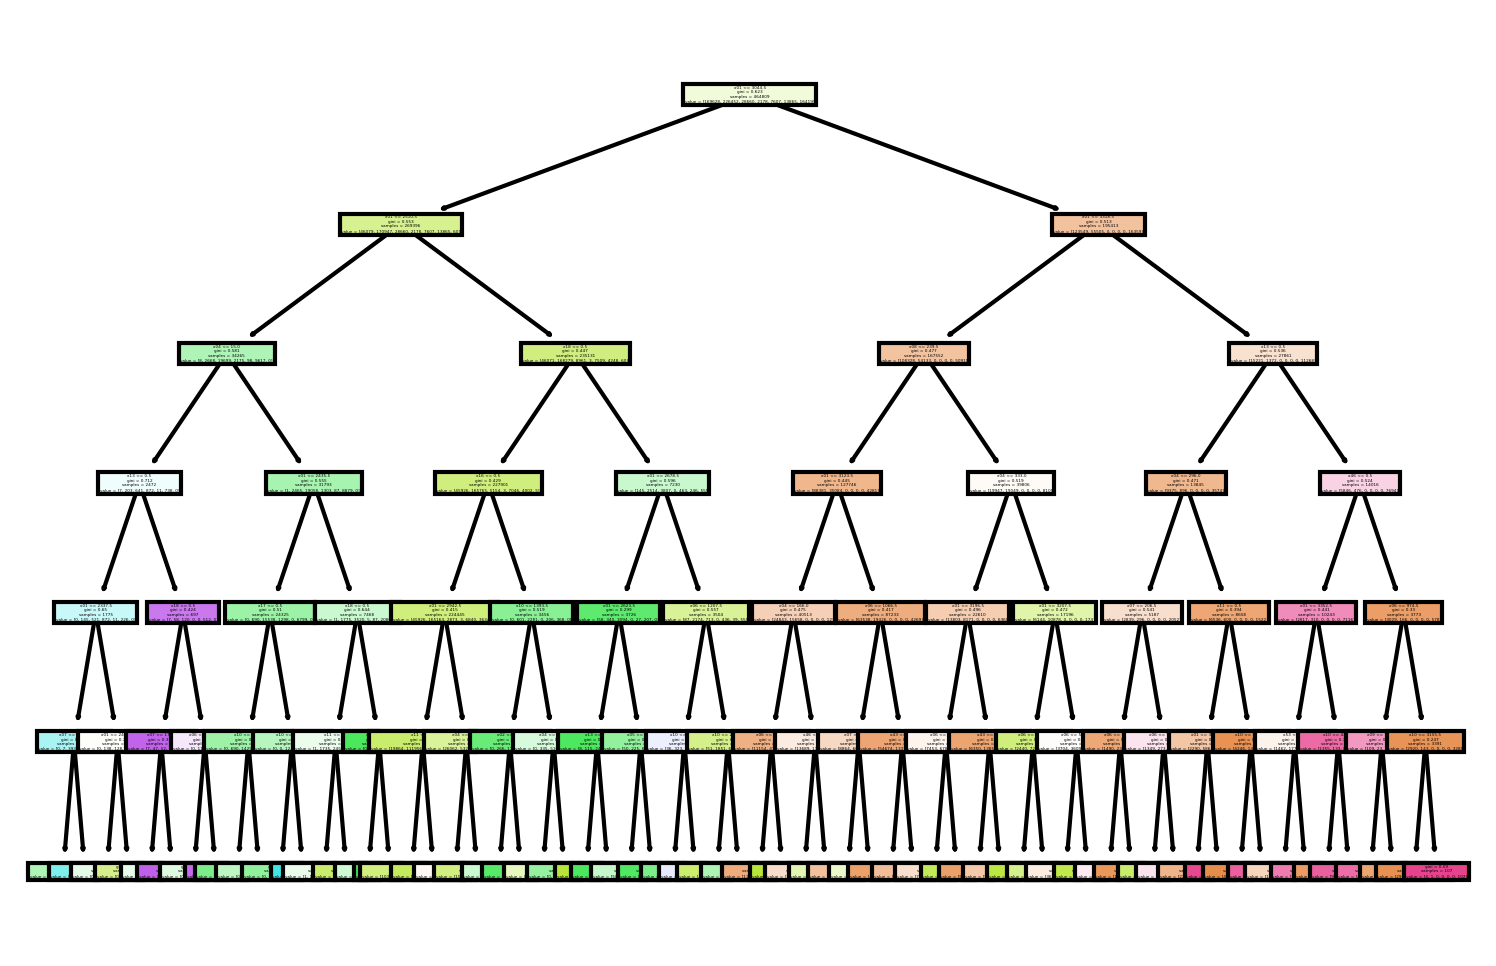

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(dpi=300)
plot_tree(model,feature_names = x_train.columns,filled = True)

분기가 어떻게 됐는지 출력

In [19]:
import numpy as np
val = np.array(model.tree_.value, dtype= 'int64')
print(val)

[[[169628 226452  28660   2178   7607  13865  16419]]

 [[ 46079 170947  28660   2178   7607  13865     60]]

 [[     8   2668  19699   2175     98   9617      0]]

 [[     7    203    641    872     11    738      0]]

 [[     0    145    521    872     11    226      0]]

 [[     0      7    393    786      0    113      0]]

 [[     0      1    198     96      0     50      0]]

 [[     0      6    195    690      0     63      0]]

 [[     0    138    128     86     11    113      0]]

 [[     0     50    124     78      0     90      0]]

 [[     0     88      4      8     11     23      0]]

 [[     7     58    120      0      0    512      0]]

 [[     7     47     52      0      0    433      0]]

 [[     4      3      9      0      0      7      0]]

 [[     3     44     43      0      0    426      0]]

 [[     0     11     68      0      0     79      0]]

 [[     0     11     60      0      0     48      0]]

 [[     0      0      8      0      0     31      0]]

 [[     1 

다수결로 잎의 종류가 정해진다.

정확도의 지표로 정답률 사용

정답률 = 맞춘 데이터 / 전체 데이터

정답률 계산

In [22]:
model.score(x_test,y_test)

0.9091761830589572

In [40]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 20, random_state = 0)

model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

DecisionTreeClassifier는 분기조건으로 두 데이터를 나눴을 때 자식 노드의 불순도가 가장 낮은 것을 선택한다.

DecisionTreeClassifier가 어떤 열을 특징으로 분기 했는지 확인

In [52]:
model.tree_.feature[0:10]

array([ 0,  0,  1,  0,  0,  3,  0, -2, -2,  0])

In [42]:
from collections import Counter
print(Counter(model.tree_.feature))
print(len(Counter(model.tree_.feature)))

Counter({-2: 12750, 9: 2223, 5: 2181, 0: 1525, 4: 1169, 3: 1139, 1: 873, 6: 835, 8: 723, 7: 675, 2: 600, 12: 61, 37: 52, 42: 52, 36: 49, 44: 45, 43: 45, 45: 44, 46: 39, 10: 34, 35: 34, 26: 30, 33: 28, 11: 28, 23: 24, 53: 23, 51: 19, 52: 18, 19: 17, 32: 17, 17: 16, 27: 14, 29: 13, 15: 13, 30: 11, 24: 10, 13: 10, 40: 8, 47: 8, 25: 7, 14: 6, 18: 5, 48: 5, 16: 3, 34: 3, 22: 3, 41: 2, 39: 2, 49: 2, 38: 2, 28: 1, 31: 1, 21: 1, 50: 1})
54


In [90]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 10, random_state = 0)

model.fit(x_train.loc[:,['x10']],y_train)
model.score(x_test.loc[:,['x10']],y_test)

0.4942729533660921

In [82]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 10, random_state = 0)

model.fit(x_train.loc[:,['x01']],y_train)
model.score(x_test.loc[:,['x01']],y_test)

0.6728139548892885

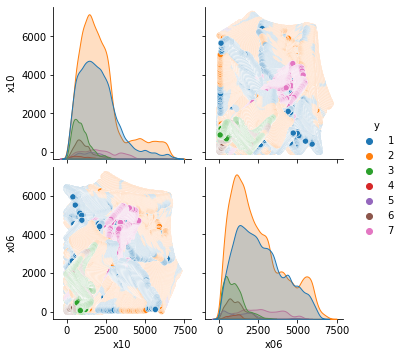

In [70]:
import seaborn as sns

sns.pairplot(vars=["x10","x06"], 
             data=df, hue='y')


분기에 사용된 특징에서의 각 데이터 분포 확인  


In [44]:
print(model.tree_.value)

[[[1.69628e+05 2.26452e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   1.64190e+04]]

 [[4.60790e+04 1.70947e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   6.00000e+01]]

 [[8.00000e+00 2.66800e+03 1.96990e+04 ... 9.80000e+01 9.61700e+03
   0.00000e+00]]

 ...

 [[0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   2.00000e+00]]

 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   2.00000e+00]]

 [[0.00000e+00 1.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   0.00000e+00]]]


In [45]:
model.score(x_test,y_test)

0.9091761830589572

In [46]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 20, random_state = 0)

model.fit(x_train.loc[:,['x01','x04','x05','x06','x10']],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

DecisionTreeClassifier는 분기조건으로 두 데이터를 나눴을 때 자식 노드의 불순도가 가장 낮은 것을 선택한다.

DecisionTreeClassifier가 어떤 열을 특징으로 분기 했는지 확인

In [47]:
model.tree_.feature

array([ 0,  0,  1, ..., -2, -2, -2])

In [48]:
from collections import Counter
print(Counter(model.tree_.feature))
print(len(Counter(model.tree_.feature)))

Counter({-2: 20241, 4: 5397, 3: 5234, 0: 3728, 2: 3205, 1: 2676})
6


분기에 사용된 특징에서의 각 데이터 분포 확인  


In [49]:
print(model.tree_.value)

[[[1.69628e+05 2.26452e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   1.64190e+04]]

 [[4.60790e+04 1.70947e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   6.00000e+01]]

 [[8.00000e+00 2.66800e+03 1.96990e+04 ... 9.80000e+01 9.61700e+03
   0.00000e+00]]

 ...

 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   1.00000e+00]]

 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   1.40000e+01]]

 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   1.57400e+03]]]


In [50]:
model.score(x_test.loc[:,['x01','x04','x05','x06','x10']],y_test)

0.8845296593031161

In [53]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 20, random_state = 0)

model.fit(x_train.loc[:,['x01','x04','x08','x13','x18']],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

DecisionTreeClassifier는 분기조건으로 두 데이터를 나눴을 때 자식 노드의 불순도가 가장 낮은 것을 선택한다.

DecisionTreeClassifier가 어떤 열을 특징으로 분기 했는지 확인

In [54]:
model.tree_.feature

array([ 0,  0,  1, ..., -2, -2, -2])

In [55]:
from collections import Counter
print(Counter(model.tree_.feature))
print(len(Counter(model.tree_.feature)))

Counter({-2: 56497, 0: 21795, 2: 16917, 1: 16821, 3: 915, 4: 48})
6


분기에 사용된 특징에서의 각 데이터 분포 확인  


In [56]:
print(model.tree_.value)

[[[1.69628e+05 2.26452e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   1.64190e+04]]

 [[4.60790e+04 1.70947e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   6.00000e+01]]

 [[8.00000e+00 2.66800e+03 1.96990e+04 ... 9.80000e+01 9.61700e+03
   0.00000e+00]]

 ...

 [[3.50000e+01 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   0.00000e+00]]

 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   6.00000e+00]]

 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   1.00000e+01]]]


In [57]:
model.score(x_test.loc[:,['x01','x04','x08','x13','x18']],y_test)

0.6979251826544925

In [58]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 10, random_state = 0)

model.fit(x_train.loc[:,['x01','x04','x05','x06','x10']],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

DecisionTreeClassifier는 분기조건으로 두 데이터를 나눴을 때 자식 노드의 불순도가 가장 낮은 것을 선택한다.

DecisionTreeClassifier가 어떤 열을 특징으로 분기 했는지 확인

In [59]:
model.tree_.feature

array([ 0,  0,  1, ..., -2, -2, -2])

In [60]:
from collections import Counter
print(Counter(model.tree_.feature))
print(len(Counter(model.tree_.feature)))

Counter({-2: 735, 4: 237, 3: 206, 0: 133, 2: 81, 1: 77})
6


분기에 사용된 특징에서의 각 데이터 분포 확인  


In [61]:
print(model.tree_.value)

[[[1.69628e+05 2.26452e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   1.64190e+04]]

 [[4.60790e+04 1.70947e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   6.00000e+01]]

 [[8.00000e+00 2.66800e+03 1.96990e+04 ... 9.80000e+01 9.61700e+03
   0.00000e+00]]

 ...

 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   1.00000e+00]]

 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   1.40000e+01]]

 [[0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   1.57400e+03]]]


In [62]:
model.score(x_test.loc[:,['x01','x04','x05','x06','x10']],y_test)

0.7460134419937523

In [63]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 10, random_state = 0)

model.fit(x_train.loc[:,['x01','x04','x08','x13','x18']],y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

DecisionTreeClassifier는 분기조건으로 두 데이터를 나눴을 때 자식 노드의 불순도가 가장 낮은 것을 선택한다.

DecisionTreeClassifier가 어떤 열을 특징으로 분기 했는지 확인

In [64]:
model.tree_.feature

array([ 0,  0,  1, ...,  2, -2, -2])

In [65]:
from collections import Counter
print(Counter(model.tree_.feature))
print(len(Counter(model.tree_.feature)))

Counter({-2: 879, 0: 300, 2: 291, 1: 235, 3: 46, 4: 6})
6


분기에 사용된 특징에서의 각 데이터 분포 확인  


In [66]:
print(model.tree_.value)

[[[1.69628e+05 2.26452e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   1.64190e+04]]

 [[4.60790e+04 1.70947e+05 2.86600e+04 ... 7.60700e+03 1.38650e+04
   6.00000e+01]]

 [[8.00000e+00 2.66800e+03 1.96990e+04 ... 9.80000e+01 9.61700e+03
   0.00000e+00]]

 ...

 [[6.00000e+01 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   5.80000e+01]]

 [[6.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   2.70000e+01]]

 [[5.40000e+01 0.00000e+00 0.00000e+00 ... 0.00000e+00 0.00000e+00
   3.10000e+01]]]


In [67]:
model.score(x_test.loc[:,['x01','x04','x08','x13','x18']],y_test)

0.7195855528686866